---
---
# Tree Types Prediction Project
---
---

## #Determines

In this project, we must perform EDA processes for implementing predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve the ability to implement algorithms for ***Multi-Class Classification***. Thus, we will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

---

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, we must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, we are soing to try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

We should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. We should do Feature Engineering using SQLite local database.

At this point, in order to improve our skills of using SQL with Python, we are asked to perform feature engineering operations using *sqlite3* library in Python.

After that, our final dataset with the new variables we have created will be ready for model building. We will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** and ***K-Nearest Neighbors (KNN)*** algorithms. Also, evaluate the success of our models with appropriate performance metrics and visualize them using ***Yellowbrick, Seaborn*** or ***Matplotlib*** modules.

At the end of the project, we will create a chart comparing the performance of all models and choose the most successful model.

- ***NOTE:*** *We will evaluate our models knowing that this is [imbalanced data](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb). This is not the primary goal of the project, but we can study solve the class [imbalance problem](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28) if also.*



---
---

## 1. Exploratory Data Analysis

### Importing Libraries, Loading Dataset, Exploring Data

#### *i. Importing the Libraries for EDA*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)

#### *ii. Loading Dataset*

In [ ]:
jungle = pd.read_csv('covtype.csv')

#### *iii. Exploring Data*

In [ ]:
jungle.shape

In [ ]:
jungle.head()

In [ ]:
jungle.info()

In [ ]:
jungle.describe()

In [ ]:
col_list = jungle.columns
for i in col_list:
    print(f'column name :{i}\n',jungle[i].value_counts(dropna=False), '\n')

In [ ]:
correlation_serie = jungle.corr()['Cover_Type'].sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(10,15))
sns.barplot(x=correlation_serie, y=correlation_serie.index, orient='h')

In [ ]:
jungle[['Soil_Type26', 'Soil_Type7', 'Soil_Type28', 'Soil_Type8','Cover_Type']].corr()['Cover_Type']

In [ ]:
pd.DataFrame(jungle.corr())[pd.DataFrame(jungle.corr())>.5]

In [ ]:
jungle.Cover_Type.value_counts(normalize=True)

In [ ]:
jungle.drop(columns=['Soil_Type7', 'Soil_Type8', 'Soil_Type15', 'Soil_Type36'],axis=1, inplace=True)

Now that some features contain highly inbalanced values we are going to drop them. 
To do so we are going to drop columns 'Soil_Type7', 'Soil_Type8', 'Soil_Type15', 'Soil_Type36'. 


***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [ ]:
# Missing value check
(jungle.isnull().sum()*100/jungle.shape[0]).sort_values()

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. 
- We can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- We can check how many outliers are there of each continuous variables.

Our continuous features are:
   * 'Elevation'
   * 'Aspect'
   * 'Slope' 
   * 'Horizontal_Distance_To_Hydrology'
   * 'Vertical_Distance_To_Hydrology'
   * 'Horizontal_Distance_To_Roadways'
   * 'Hillshade_9am'
   * 'Hillshade_Noon'
   * 'Hillshade_3pm'
   * 'Horizontal_Distance_To_Fire_Points'

In [ ]:
plt.figure(figsize = (8, 12))
plt.subplot(311)
sns.distplot(jungle.Elevation)
plt.subplot(312)
sns.boxplot(jungle.Elevation, orient='h')
plt.subplot(313)
sns.scatterplot(y='Elevation', x = 'Cover_Type', data=jungle)

In [ ]:
plt.figure(figsize = (8, 12))
plt.subplot(311)
sns.distplot(jungle.Aspect)
plt.subplot(312)
sns.boxplot(jungle.Aspect, orient='h')
plt.subplot(313)
sns.scatterplot(y='Aspect', x = 'Cover_Type', data=jungle)

In [ ]:
plt.figure(figsize = (8, 12))
plt.subplot(311)
sns.distplot(jungle.Slope)
plt.subplot(312)
sns.boxplot(jungle.Slope, orient='h')
plt.subplot(313)
sns.scatterplot(y='Slope', x = 'Cover_Type', data=jungle)

In [ ]:
plt.figure(figsize = (8, 12))
plt.subplot(311)
sns.distplot(jungle.Horizontal_Distance_To_Hydrology)
plt.subplot(312)
sns.boxplot(jungle.Horizontal_Distance_To_Hydrology, orient='h')
plt.subplot(313)
sns.scatterplot(y='Horizontal_Distance_To_Hydrology', x = 'Cover_Type', data=jungle)

In [ ]:
plt.figure(figsize = (8, 12))
plt.subplot(311)
sns.distplot(jungle.Vertical_Distance_To_Hydrology)
plt.subplot(312)
sns.boxplot(jungle.Vertical_Distance_To_Hydrology, orient='h')
plt.subplot(313)
sns.scatterplot(y='Vertical_Distance_To_Hydrology', x = 'Cover_Type', data=jungle)

In [ ]:
plt.figure(figsize = (8, 12))
plt.subplot(311)
sns.distplot(jungle.Horizontal_Distance_To_Roadways)
plt.subplot(312)
sns.boxplot(jungle.Horizontal_Distance_To_Roadways, orient='h')
plt.subplot(313)
sns.scatterplot(y='Horizontal_Distance_To_Roadways', x = 'Cover_Type', data=jungle)

In [ ]:
plt.figure(figsize = (8, 12))
plt.subplot(311)
sns.distplot(jungle.Hillshade_9am)
plt.subplot(312)
sns.boxplot(jungle.Hillshade_9am, orient='h')
plt.subplot(313)
sns.scatterplot(y='Hillshade_9am', x = 'Cover_Type', data=jungle)

In [ ]:
plt.figure(figsize = (8, 12))
plt.subplot(311)
sns.distplot(jungle.Hillshade_Noon)
plt.subplot(312)
sns.boxplot(jungle.Hillshade_Noon, orient='h')
plt.subplot(313)
sns.scatterplot(y='Hillshade_Noon', x = 'Cover_Type', data=jungle)

In [ ]:
plt.figure(figsize = (8, 12))
plt.subplot(311)
sns.distplot(jungle.Hillshade_3pm)
plt.subplot(312)
sns.boxplot(jungle.Hillshade_3pm, orient='h')
plt.subplot(313)
sns.scatterplot(y='Hillshade_3pm', x = 'Cover_Type', data=jungle)

In [ ]:
plt.figure(figsize = (8, 12))
plt.subplot(311)
sns.distplot(jungle.Horizontal_Distance_To_Fire_Points)
plt.subplot(312)
sns.boxplot(jungle.Horizontal_Distance_To_Fire_Points, orient='h')
plt.subplot(313)
sns.scatterplot(y='Horizontal_Distance_To_Fire_Points', x = 'Cover_Type', data=jungle)

### Deal with Outliers

#### *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*

There are many different methods for outliers. We can use IQR values used as standard to deal with outliers, or you can define two functions to help you understand the outliers and how you can deal with them.

In [ ]:
from scipy.stats.mstats import winsorize
from scipy.stats import zscore
from scipy import stats

In [ ]:
zscore(jungle.Elevation)

In [ ]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile_threshold)

In [ ]:
def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step, print_list=True)
    plt.show()

In [ ]:
continues_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

In [ ]:
outlier_inspect(jungle, continues_features[0], min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50)

In [ ]:
def outliers_zscore(df, col, z_treshold=3, row_val='row'):
    threshold = z_treshold
    mean_y = np.mean(df[col])
    stdev_y = np.std(df[col])
    z_scores = [(y - mean_y) / stdev_y for y in df[col]]
    outlier_rows = pd.DataFrame([i for i in np.where(np.abs(z_scores) > threshold)]).T[0]
    outlier_values = pd.DataFrame([df[col].iloc[i] for i in np.where(np.abs(z_scores) > threshold)]).T
    if row_val=='row':
        return outlier_rows
    else:
        return outlier_values

In [ ]:
elevation_outlier_lst = list(outliers_zscore(jungle, 'Elevation', z_treshold=3,row_val='val').Elevation)

In [ ]:
elevation_outlier = jungle.Elevation.isin(elevation_outlier_lst)

In [ ]:
elevation_outlier.value_counts()

In [ ]:
jungle.loc[elevation_outlier,'Elevation'] = np.nan

In [ ]:
jungle.Elevation.value_counts(dropna=False)

In [ ]:
jungle.groupby('Cover_Type')['Elevation'].median()

In [ ]:
jungle.groupby('Cover_Type')['Elevation'].mean()

In [ ]:
jungle.Elevation = jungle.Elevation.fillna(jungle.groupby('Cover_Type')['Elevation'].transform('median'))

In [ ]:
jungle.Elevation.isnull().value_counts()

#### *ii. Drop Outliers*

You can define another function to detect outliers in accordance with the ``zscore`` (how many times IQR) value you choose according to the result from the previous functions.

In [ ]:
outlier_inspect(jungle, continues_features[1], min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50)

In [ ]:
outlier_inspect(jungle, continues_features[2], min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50)

In [ ]:
slope_outlier_lst = list(outliers_zscore(jungle, 'Slope', z_treshold=3,row_val='val').Slope)

In [ ]:
slope_outlier = jungle.Slope.isin(slope_outlier_lst)

In [ ]:
slope_outlier.value_counts()

In [ ]:
jungle.loc[slope_outlier,'Slope'] = np.nan

In [ ]:
jungle.Slope.value_counts(dropna=False)

In [ ]:
jungle.groupby('Cover_Type')['Slope'].median()

In [ ]:
jungle.groupby('Cover_Type')['Slope'].mean()

In [ ]:
jungle.Slope = jungle.Slope.fillna(jungle.groupby('Cover_Type')['Slope'].transform('median'))

In [ ]:
jungle.Slope.isnull().value_counts()

In [ ]:
outlier_inspect(jungle, continues_features[3], min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50)

In [ ]:
horhyd_outlier_lst = list(outliers_zscore(jungle, 'Horizontal_Distance_To_Hydrology', z_treshold=4,row_val='val').Horizontal_Distance_To_Hydrology)

In [ ]:
horhyd_outlier = jungle.Horizontal_Distance_To_Hydrology.isin(horhyd_outlier_lst)

In [ ]:
horhyd_outlier.value_counts()

In [ ]:
jungle.loc[horhyd_outlier,'Horizontal_Distance_To_Hydrology'] = np.nan

In [ ]:
jungle.Horizontal_Distance_To_Hydrology.isnull().value_counts()

In [ ]:
jungle.groupby('Cover_Type')['Horizontal_Distance_To_Hydrology'].median()

In [ ]:
jungle.groupby('Cover_Type')['Horizontal_Distance_To_Hydrology'].mean()

In [ ]:
jungle.Horizontal_Distance_To_Hydrology = jungle.Horizontal_Distance_To_Hydrology.fillna(jungle.groupby('Cover_Type')['Horizontal_Distance_To_Hydrology'].transform('median'))
jungle.Horizontal_Distance_To_Hydrology.isnull().value_counts()

In [ ]:
outlier_inspect(jungle, continues_features[4], min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50)

In [ ]:
verdist_outlier_lst = list(outliers_zscore(jungle, continues_features[4], z_treshold=2.5,row_val='val')[continues_features[4]])

In [ ]:
len(verdist_outlier_lst)

In [ ]:
def outliers_iqr(df, col_name):
    '''
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [ ]:
jungle[(jungle[continues_features[4]] < outliers_iqr(jungle, continues_features[4])[0]) | (jungle[continues_features[4]] > outliers_iqr(jungle, continues_features[4])[1])]

In [ ]:
outlier_df = jungle[(jungle[continues_features[4]] < outliers_iqr(jungle, continues_features[4])[0]) | (jungle[continues_features[4]] > outliers_iqr(jungle, continues_features[4])[1])]

In [ ]:
verdist_outlier_lst = outlier_df[continues_features[4]].tolist()

In [ ]:
verdist_outlier = jungle.Vertical_Distance_To_Hydrology.isin(verdist_outlier_lst)

In [ ]:
verdist_outlier.value_counts()

In [ ]:
jungle.loc[verdist_outlier,'Vertical_Distance_To_Hydrology'] = np.nan

In [ ]:
jungle[[continues_features[4]]].isnull().value_counts()

In [ ]:
jungle.groupby('Cover_Type')['Vertical_Distance_To_Hydrology'].median()

In [ ]:
jungle.groupby('Cover_Type')['Vertical_Distance_To_Hydrology'].mean()

In [ ]:
jungle.Vertical_Distance_To_Hydrology = jungle.Vertical_Distance_To_Hydrology.fillna(jungle.groupby('Cover_Type')['Vertical_Distance_To_Hydrology'].transform('median'))
jungle.Vertical_Distance_To_Hydrology.isnull().value_counts()

In [ ]:
outlier_inspect(jungle, continues_features[5], min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50)

In [ ]:
outlier_lst = list(outliers_zscore(jungle, continues_features[5], z_treshold=3,row_val='val')[continues_features[5]])

In [ ]:
len(outlier_lst)

In [ ]:
roadway_outlier = jungle[continues_features[5]].isin(outlier_lst)

In [ ]:
roadway_outlier.value_counts()

In [ ]:
jungle.loc[roadway_outlier,'Horizontal_Distance_To_Roadways'] = np.nan

In [ ]:
jungle[[continues_features[5]]].isnull().value_counts()

In [ ]:
jungle.groupby('Cover_Type')['Horizontal_Distance_To_Roadways'].median()

In [ ]:
jungle.groupby('Cover_Type')['Horizontal_Distance_To_Roadways'].mean()

In [ ]:
jungle.Horizontal_Distance_To_Roadways = jungle.Horizontal_Distance_To_Roadways.fillna(jungle.groupby('Cover_Type')['Horizontal_Distance_To_Roadways'].transform('median'))
jungle.Horizontal_Distance_To_Roadways.isnull().value_counts()

In [ ]:
outlier_inspect(jungle, continues_features[6], min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50)

In [ ]:
outlier_lst = list(outliers_zscore(jungle, continues_features[6], z_treshold=2,row_val='val')[continues_features[6]])

In [ ]:
len(outlier_lst)

In [ ]:
jungle[(jungle[continues_features[6]] < outliers_iqr(jungle, continues_features[6])[0]) | (jungle[continues_features[6]] > outliers_iqr(jungle, continues_features[6])[1])]

In [ ]:
outlier_df = jungle[(jungle[continues_features[6]] < outliers_iqr(jungle, continues_features[6])[0]) | (jungle[continues_features[6]] > outliers_iqr(jungle, continues_features[6])[1])]

In [ ]:
outlier_lst = outlier_df[continues_features[6]].tolist()

In [ ]:
Hillshade_9am_outlier = jungle.Hillshade_9am.isin(outlier_lst)

In [ ]:
Hillshade_9am_outlier.value_counts()

In [ ]:
jungle.loc[Hillshade_9am_outlier,'Hillshade_9am'] = np.nan

In [ ]:
jungle[[continues_features[6]]].isnull().value_counts()

In [ ]:
jungle.groupby('Cover_Type')['Hillshade_9am'].median()

In [ ]:
jungle.groupby('Cover_Type')['Hillshade_9am'].mean()

In [ ]:
jungle.Hillshade_9am = jungle.Hillshade_9am.fillna(jungle.groupby('Cover_Type')['Hillshade_9am'].transform('median'))
jungle.Hillshade_9am.isnull().value_counts()

In [ ]:
outlier_inspect(jungle, continues_features[7], min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50)

In [ ]:
outlier_lst = list(outliers_zscore(jungle, continues_features[7], z_treshold=2,row_val='val')[continues_features[7]])

In [ ]:
len(outlier_lst)

In [ ]:
jungle[(jungle[continues_features[7]] < outliers_iqr(jungle, continues_features[7])[0]) | (jungle[continues_features[7]] > outliers_iqr(jungle, continues_features[7])[1])]

In [ ]:
outlier_df = jungle[(jungle[continues_features[7]] < outliers_iqr(jungle, continues_features[7])[0]) | (jungle[continues_features[7]] > outliers_iqr(jungle, continues_features[7])[1])]

In [ ]:
outlier_lst = outlier_df[continues_features[7]].tolist()

In [ ]:
Hillshade_noon_outlier = jungle[continues_features[7]].isin(outlier_lst)

In [ ]:
Hillshade_noon_outlier.value_counts()

In [ ]:
jungle.loc[Hillshade_noon_outlier,continues_features[7]] = np.nan

In [ ]:
jungle[[continues_features[7]]].isnull().value_counts()

In [ ]:
jungle.groupby('Cover_Type')[continues_features[7]].median()

In [ ]:
jungle.groupby('Cover_Type')[continues_features[7]].mean()

In [ ]:
jungle[continues_features[7]] = jungle[continues_features[7]].fillna(jungle.groupby('Cover_Type')[continues_features[7]].transform('median'))
jungle[continues_features[7]].isnull().value_counts()

In [ ]:
outlier_inspect(jungle, continues_features[8], min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50)

In [ ]:
outlier_lst = list(outliers_zscore(jungle, continues_features[8], z_treshold=2.5,row_val='val')[continues_features[8]])

In [ ]:
len(outlier_lst)

In [ ]:
Hillshade_3pm_outlier = jungle[continues_features[8]].isin(outlier_lst)

In [ ]:
Hillshade_3pm_outlier.value_counts()

In [ ]:
jungle.loc[Hillshade_3pm_outlier,continues_features[8]] = np.nan

In [ ]:
jungle[[continues_features[8]]].isnull().value_counts()

In [ ]:
jungle.groupby('Cover_Type')[continues_features[8]].median()

In [ ]:
jungle.groupby('Cover_Type')[continues_features[8]].mean()

In [ ]:
jungle[continues_features[8]] = jungle[continues_features[8]].fillna(jungle.groupby('Cover_Type')[continues_features[8]].transform('median'))
jungle[continues_features[8]].isnull().value_counts()

In [ ]:
outlier_inspect(jungle, continues_features[9], min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50)

In [ ]:
outlier_lst = list(outliers_zscore(jungle, continues_features[9], z_treshold=3.5,row_val='val')[continues_features[9]])

In [ ]:
outliers = jungle[continues_features[9]].isin(outlier_lst)

In [ ]:
outliers.value_counts()

In [ ]:
jungle[continues_features[9]] = winsorize(jungle[continues_features[9]], (0, 0.0021))

In [ ]:
jungle[continues_features[9]].describe()

***
***

## 3. Feature Engineering with *sqlite3* Library

Feature engineering is a process to increase the predictive success of the model. The effort we put in should be worth increasing success. So we can develop our own feature engineering approach.

Naturally, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

We are going do feature engineering operations with SQL in order to shine up our rusty skills regrding SQL with python. We have two choices:
1. After moving the final version of our data set to ***SQLite Browser*** and performing feature engineering operations there, we can convert the resulting data set to dataframe format and use it again in python.
2. In Python, also we can create a database and table with our data set by using the functions of the sqlite3 library, after performing feature engineering with SQL, we can convert the resulting data set to a dataframe.

In this case, we will illustrate the second method.

We will follow the steps below to do feature engineering with the [sqlite3](https://docs.python.org/3/library/sqlite3.html) library:
 1. Importing *sqlite3* library
 2. Creating a sqlite database (``"tree_database"``) and transferring dataframe(``jungle``) from python into database table (``covtype2``)
  - We can use *connect(), to_sql() and read_sql_query()* functions.
 3. Assigning SQL codes for feature engineering to an object. (producing or transform new columns, getting rid of unnecassary columns, making the dataset ready to model)
 4. Transforming final version of SQL table to dataframe.
 
Finally, you can save the final version of your data as csv for use in your models and work on a different notebook. On the other hand, we can continue to work on this notebook with the last dataframe.

In [ ]:
import sqlite3

In [ ]:
sqlite3.connect('tree_database.db')

In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [ ]:
jungle.to_sql('covtype_sql', con=engine)

In [134]:
engine.execute("SELECT * FROM covtype_sql")

***
***

## 4. Prediction (Multi-class Classification)

Now that we have finished data wrangling, we are ready to dive in the most fun part of the project; using machine learning algorithms to making predictions and getting insights out of our data.

In this section, we have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - XGBoost (Using ``XGBClassifier`` model from``xgboost`` module)
 - SVM (Using ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Using ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - KNN (Using ``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
 - Random Forest (Using ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 

2. Visualizing the Result

- Using [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Showing three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [135]:
# Librarys for all algorithms
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, f1_score
from sklearn.preprocessing import scale, StandardScaler

# Librarys for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

# Librarys for KNN
from sklearn.neighbors import KNeighborsClassifier


# Librarys for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Librarys for Random Forest
from sklearn.ensemble import RandomForestClassifier

# Librarys for XGBoost
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Librarys for SVM
from sklearn.svm import SVC

# Additional/ out of context libraries
import warnings
warnings.filterwarnings("ignore")

### Data Preprocessing

In [136]:
X = jungle.drop(['Cover_Type'], axis=1)
y = jungle.Cover_Type

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, stratify=y, random_state=101)

### Implementing KNeighborsClassifer

The first and most important step for the [KNN](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/) algorithm is to determining the optimal k (number of neighbors). 

We are going to build different models with k values in the range we specify. We will observe the change of train and test accuracy values according to different k values using a plot. The point at which train accuracy and test accuracy values begin to run parallel is the optimal k value. Then we will set up our final KNN model with the optimal k value we determined and calculate accuracy.

- Importing the modul
- Fitting the model 
- Predicting the test set
- Visualizing the result
- Evaluating the performance

In [138]:
X_train_scaled = StandardScaler().fit_transform(X_train)

In [139]:
X_test_scaled = StandardScaler().fit_transform(X_test)

In [178]:
knn = KNeighborsClassifier()

In [179]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [180]:
y_pred_knn = knn.predict(X_test_scaled)

In [181]:
confusion_matrix(y_test, y_pred_knn)

array([[58444,  4738,     5,     0,    42,    16,   307],
       [ 3876, 80189,   287,     2,   316,   275,    46],
       [   13,   330,  9670,    69,    26,   618,     0],
       [    0,     1,   137,   629,     0,    57,     0],
       [  105,   528,    41,     0,  2163,    11,     0],
       [   21,   325,   712,    38,    12,  4102,     0],
       [  400,    64,     0,     0,     1,     0,  5688]])

In [ ]:
print(classification_report(y_test, y_pred_knn))

In [ ]:
error_rate = []

# We have a relative large data set, thus it will take quite a long time.
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))
    print(f'{i} of 40 is completed')

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [140]:
dtree = DecisionTreeClassifier()

In [141]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [142]:
y_pred_dtc = dtree.predict(X_test)

In [143]:
confusion_matrix(y_test, y_pred_dtc)

array([[59193,  3957,     3,     0,    59,     6,   334],
       [ 3768, 80294,   261,     5,   401,   216,    46],
       [    8,   247,  9957,    85,    24,   405,     0],
       [    0,     1,    84,   695,     0,    44,     0],
       [   61,   423,    33,     0,  2310,    13,     8],
       [   10,   232,   437,    39,     7,  4485,     0],
       [  341,    41,     0,     0,     0,     0,  5771]])

In [144]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93     63552
           2       0.94      0.94      0.94     84991
           3       0.92      0.93      0.93     10726
           4       0.84      0.84      0.84       824
           5       0.82      0.81      0.82      2848
           6       0.87      0.86      0.86      5210
           7       0.94      0.94      0.94      6153

    accuracy                           0.93    174304
   macro avg       0.90      0.89      0.90    174304
weighted avg       0.93      0.93      0.93    174304



### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [145]:
rf_model=RandomForestClassifier().fit(X_train, y_train)

In [146]:
y_pred_rf = rf_model.predict(X_test)

In [147]:
confusion_matrix(y_test, y_pred_rf)

array([[59841,  3573,     0,     0,    10,    12,   116],
       [ 1956, 82631,   174,     2,    91,   114,    23],
       [    4,   171, 10304,    34,    10,   203,     0],
       [    0,     0,    83,   710,     0,    31,     0],
       [   48,   571,    32,     0,  2186,    11,     0],
       [    5,   154,   344,    20,     4,  4683,     0],
       [  358,    37,     0,     0,     0,     0,  5758]])

In [148]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63552
           2       0.95      0.97      0.96     84991
           3       0.94      0.96      0.95     10726
           4       0.93      0.86      0.89       824
           5       0.95      0.77      0.85      2848
           6       0.93      0.90      0.91      5210
           7       0.98      0.94      0.96      6153

    accuracy                           0.95    174304
   macro avg       0.95      0.91      0.92    174304
weighted avg       0.95      0.95      0.95    174304



Random Forest Model Tuning

In [149]:
rf=RandomForestClassifier()

In [150]:
rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

In [151]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 118.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 222.2min finished


In [152]:
rf_cv_model.best_params_

{'max_depth': 7, 'max_features': 8, 'min_samples_split': 6, 'n_estimators': 50}

In [171]:
rf_tuned = RandomForestClassifier(max_depth = 7,             
                                  max_features = 8, 
                                  min_samples_split = 6, 
                                  n_estimators = 50).fit(X_train, y_train)

In [172]:
y_pred_rf_tuned = rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred_rf_tuned)

array([[46530, 16992,     0,     0,     0,     0,    30],
       [16218, 68090,   666,     0,     0,    16,     1],
       [    0,  2569,  8136,     6,     0,    15,     0],
       [    0,     0,   647,   175,     0,     2,     0],
       [    0,  2837,    11,     0,     0,     0,     0],
       [    0,  2126,  2968,     7,     0,   109,     0],
       [ 5049,    23,     0,     0,     0,     0,  1081]])

In [173]:
print(classification_report(y_test, y_pred_rf_tuned))

              precision    recall  f1-score   support

           1       0.69      0.73      0.71     63552
           2       0.74      0.80      0.77     84991
           3       0.65      0.76      0.70     10726
           4       0.93      0.21      0.35       824
           5       0.00      0.00      0.00      2848
           6       0.77      0.02      0.04      5210
           7       0.97      0.18      0.30      6153

    accuracy                           0.71    174304
   macro avg       0.68      0.39      0.41    174304
weighted avg       0.71      0.71      0.69    174304



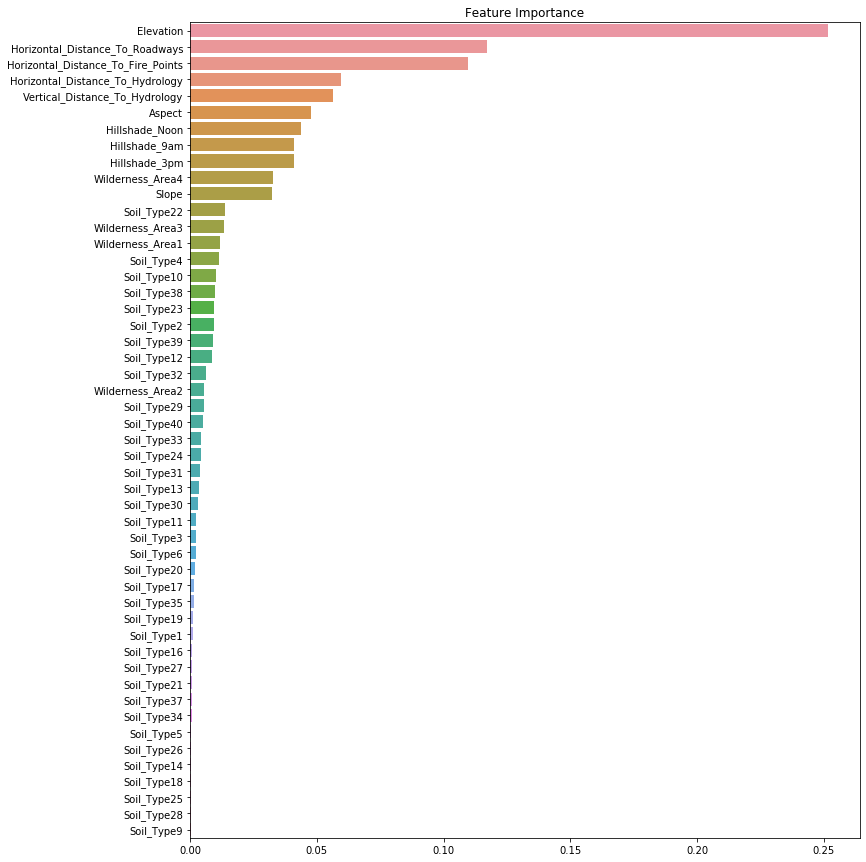

In [166]:
feature_imp = pd.Series(rf_model.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12,15))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [167]:
from xgboost import XGBClassifier

In [174]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [175]:
y_pred_xgb = xgb_model.predict(X_test)
confusion_matrix(y_test, y_pred_xgb)

array([[53433,  9814,     2,     0,    24,     9,   270],
       [ 8226, 75985,   347,     1,   148,   256,    28],
       [    3,   497,  9718,    52,     2,   454,     0],
       [    0,     0,    67,   719,     0,    38,     0],
       [   22,  1062,    42,     0,  1710,    12,     0],
       [   11,   325,   546,    16,     3,  4309,     0],
       [  603,    14,     0,     0,     0,     0,  5536]])

In [176]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           1       0.86      0.84      0.85     63552
           2       0.87      0.89      0.88     84991
           3       0.91      0.91      0.91     10726
           4       0.91      0.87      0.89       824
           5       0.91      0.60      0.72      2848
           6       0.85      0.83      0.84      5210
           7       0.95      0.90      0.92      6153

    accuracy                           0.87    174304
   macro avg       0.89      0.83      0.86    174304
weighted avg       0.87      0.87      0.87    174304



Tuning XGBoot Classifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb_params = {"n_estimators": [50, 100, 300, 1000],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [ ]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
xgb_tuned = XGBClassifier(learning_rate=,  
                                n_estimators=, 
                                n_jobs=4).fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=5)

In [ ]:
y_pred_xgb_tuned = xgb_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred_xgb_tuned))

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [ ]:
svm_model = SVC().fit(X_train_scaled, y_train)

In [ ]:
y_pred_svm = svm_model.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_svm)

In [ ]:
print(classification_report(y_test, y_pred_svm))

SVM Model Tuning

In [ ]:
svm_tune = SVC()

In [ ]:
svm_params = {"kernel": ["linear","rbf", "poly", "sigmoid"]}

In [ ]:
svm_cv_model = GridSearchCV(svm_tune, svm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)

In [ ]:
svm_cv_model.best_params_

In [ ]:
svm_tune_2 = SVC(kernel=)

In [ ]:
svm_params_2 = {"C": [0.1,0.5,1,10,20,50]}

In [ ]:
svm_cv_model_2 = GridSearchCV(svm_tune_2, svm_params_2, cv = 5, n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)

In [ ]:
svm_cv_model_2.best_params_

In [ ]:
svm_tuned_final = SVC(C = , kernel="").fit(X_train_scaled, y_train)

In [ ]:
y_pred_svm_final = svm_tuned_final.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_svm_final)

In [ ]:
print(classification_report(y_test, y_pred_svm_final))

### Compare The Models

So far, you have created a multi-classifier model with 5 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___